<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Skewness_and_Kurtosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white", color_codes=True, rc={'figure.figsize':(15,8)})

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
GE_results = pd.read_csv("/content/drive/MyDrive/Government Datasets/GE_2024_Results.csv")

In [4]:
GE_results.head()

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost


In [5]:
GE_results.shape

(8902, 10)

In [6]:
GE_results.set_index("ID", inplace=True)

In [7]:
GE_results["EVM Votes"] = pd.to_numeric(GE_results["EVM Votes"], errors='coerce')
GE_results["Postal Votes"] = pd.to_numeric(GE_results["Postal Votes"], errors='coerce')
GE_results["% of Votes"] = GE_results["% of Votes"].replace("-", np.nan).astype(np.float64)

In [8]:
GE_results.head()

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
ID,,,,,,,,,
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436,50.58,Won
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040,38.54,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254,4.08,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017,2.97,Lost
5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203,1.09,Lost


In [9]:
GE_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8902 entries, 1 to 8902
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         8902 non-null   object 
 1   Constituency  8902 non-null   object 
 2   Candidate     8902 non-null   object 
 3   Party         8902 non-null   object 
 4   EVM Votes     8901 non-null   float64
 5   Postal Votes  8324 non-null   float64
 6   Total Votes   8902 non-null   int64  
 7   % of Votes    8901 non-null   float64
 8   Result        8902 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 695.5+ KB


In [10]:
GE_results.describe().T

,count,mean,std,min,25%,50%,75%,max
EVM Votes,8901.0,72083.916077,178879.674654,58.00,1085.00,2769.00,9681.00,1468549.00
Postal Votes,8324.0,449.844786,1380.591598,1.00,4.00,11.00,59.00,19827.00
Total Votes,8902.0,72496.455291,179898.773637,0.00,1094.25,2781.00,9759.50,1471885.00
% of Votes,8901.0,6.089172,14.630761,0.01,0.09,0.24,0.81,78.54


In [11]:
GE_results_normalized = GE_results.copy()

GE_results_normalized["EVM Votes"] = (GE_results_normalized["EVM Votes"]-GE_results_normalized["EVM Votes"].min())/(GE_results_normalized["EVM Votes"].max()-GE_results_normalized["EVM Votes"].min())
GE_results_normalized["Postal Votes"] = (GE_results_normalized["Postal Votes"]-GE_results_normalized["Postal Votes"].min())/(GE_results_normalized["Postal Votes"].max()-GE_results_normalized["Postal Votes"].min())
GE_results_normalized["Total Votes"] = (GE_results_normalized["Total Votes"]-GE_results_normalized["Total Votes"].min())/(GE_results_normalized["Total Votes"].max()-GE_results_normalized["Total Votes"].min())
GE_results_normalized["% of Votes"] = (GE_results_normalized["% of Votes"]-GE_results_normalized["% of Votes"].min())/(GE_results_normalized["% of Votes"].max()-GE_results_normalized["% of Votes"].min())

GE_results_normalized.head()

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
ID,,,,,,,,,
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,0.069543,0.012761,0.069595,0.643958,Won
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,0.052960,0.010592,0.053020,0.490641,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,0.005569,0.000857,0.005608,0.051827,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),0.004052,0.000353,0.004088,0.037693,Lost
5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,0.001455,0.000353,0.001497,0.013753,Lost


In [12]:
GE_results_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
EVM Votes,8901.0,0.049048,0.121812,0.0,0.000699,0.001846,0.006553,1.0
Postal Votes,8324.0,0.022639,0.069635,0.0,0.000151,0.000504,0.002925,1.0
Total Votes,8902.0,0.049254,0.122223,0.0,0.000743,0.001889,0.006631,1.0
% of Votes,8901.0,0.077412,0.186308,0.0,0.001019,0.002929,0.010187,1.0


In [13]:
GE_results_standardized = GE_results.copy()

GE_results_standardized["EVM Votes"] = ( GE_results_standardized["EVM Votes"] - GE_results_standardized["EVM Votes"].mean() ) / GE_results_standardized["EVM Votes"].std()
GE_results_standardized["Postal Votes"] = ( GE_results_standardized["Postal Votes"] - GE_results_standardized["Postal Votes"].mean() ) / GE_results_standardized["Postal Votes"].std()
GE_results_standardized["Total Votes"] = ( GE_results_standardized["Total Votes"] - GE_results_standardized["Total Votes"].mean() ) / GE_results_standardized["Total Votes"].std()
GE_results_standardized["% of Votes"] = ( GE_results_standardized["% of Votes"] - GE_results_standardized["% of Votes"].mean() ) / GE_results_standardized["% of Votes"].std()

GE_results_standardized.head()

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
ID,,,,,,,,,
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,0.168259,-0.141856,0.166424,3.040910,Won
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,0.032117,-0.173002,0.030815,2.217986,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,-0.356932,-0.312797,-0.357103,-0.137325,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),-0.369382,-0.320040,-0.369538,-0.213193,Lost
5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,-0.390704,-0.320040,-0.390739,-0.341689,Lost


In [14]:
GE_results_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
EVM Votes,8901.0,-6.386183e-18,1.0,-0.402650,-0.396909,-0.387495,-0.348854,7.806729
Postal Votes,8324.0,-2.432781e-17,1.0,-0.325110,-0.322937,-0.317867,-0.283099,14.035400
Total Votes,8902.0,0.000000e+00,1.0,-0.402985,-0.396902,-0.387526,-0.348735,7.778755
% of Votes,8901.0,-2.235164e-17,1.0,-0.415506,-0.410038,-0.399786,-0.360827,4.951952


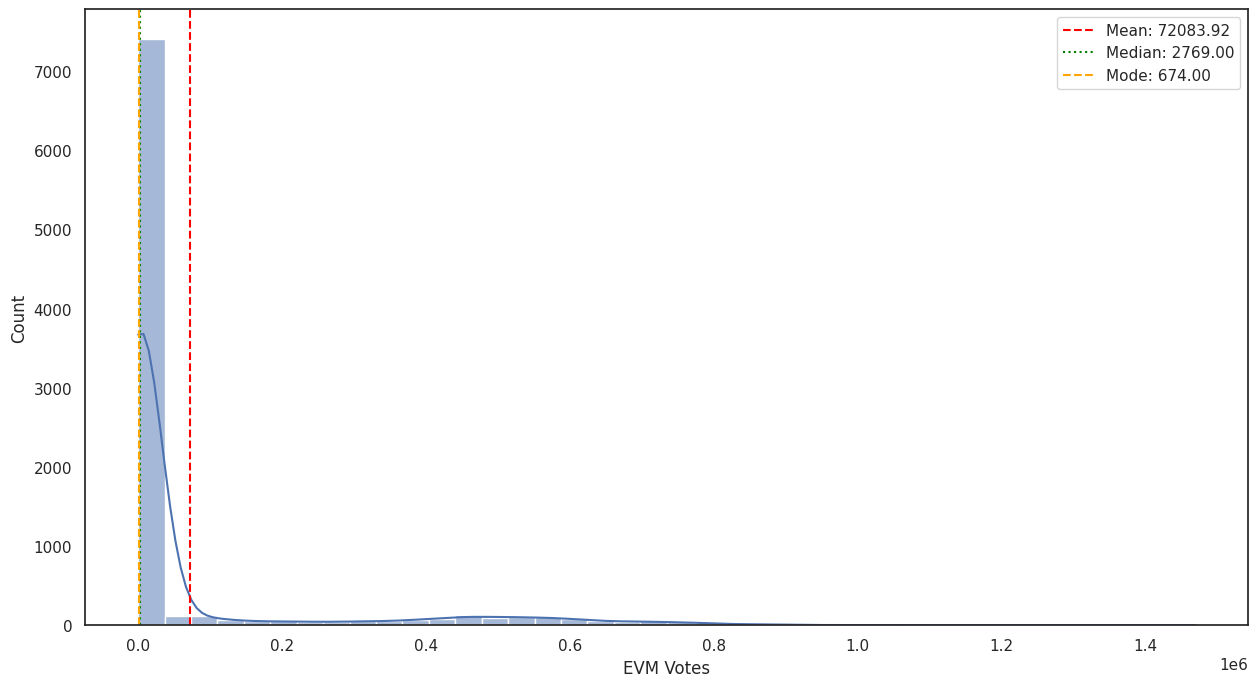

In [15]:
sns.histplot(x="EVM Votes", data=GE_results, kde=True, bins=40)
plt.axvline(GE_results["EVM Votes"].mean(),
            color="red", linestyle='dashed',
            label=f"Mean: {GE_results['EVM Votes'].mean():.2f}")
plt.axvline(GE_results["EVM Votes"].median(),
            color="green", linestyle='dotted',
            label=f"Median: {GE_results['EVM Votes'].median():.2f}")
plt.axvline(GE_results["EVM Votes"].mode()[0],
            color="orange", linestyle='dashed',
            label=f"Mode: {GE_results['EVM Votes'].mode()[0]:.2f}")
plt.legend()
plt.show()

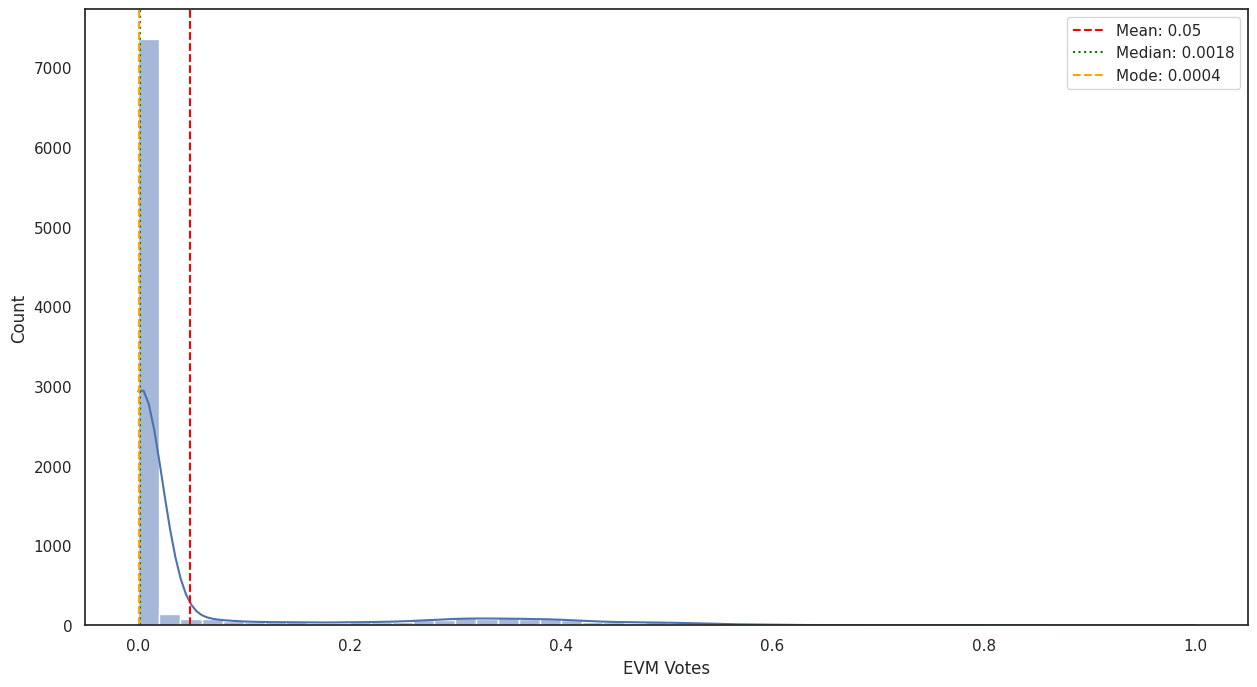

In [16]:
sns.histplot(x="EVM Votes", data=GE_results_normalized, kde=True, bins=50)
plt.axvline(GE_results_normalized["EVM Votes"].mean(),
            color="red", linestyle='dashed',
            label=f"Mean: {GE_results_normalized['EVM Votes'].mean():.2f}")
plt.axvline(GE_results_normalized["EVM Votes"].median(),
            color="green", linestyle='dotted',
            label=f"Median: {GE_results_normalized['EVM Votes'].median():.4f}")
plt.axvline(GE_results_normalized["EVM Votes"].mode()[0],
            color="orange", linestyle='dashed',
            label=f"Mode: {GE_results_normalized['EVM Votes'].mode()[0]:.4f}")
plt.legend()
plt.show()

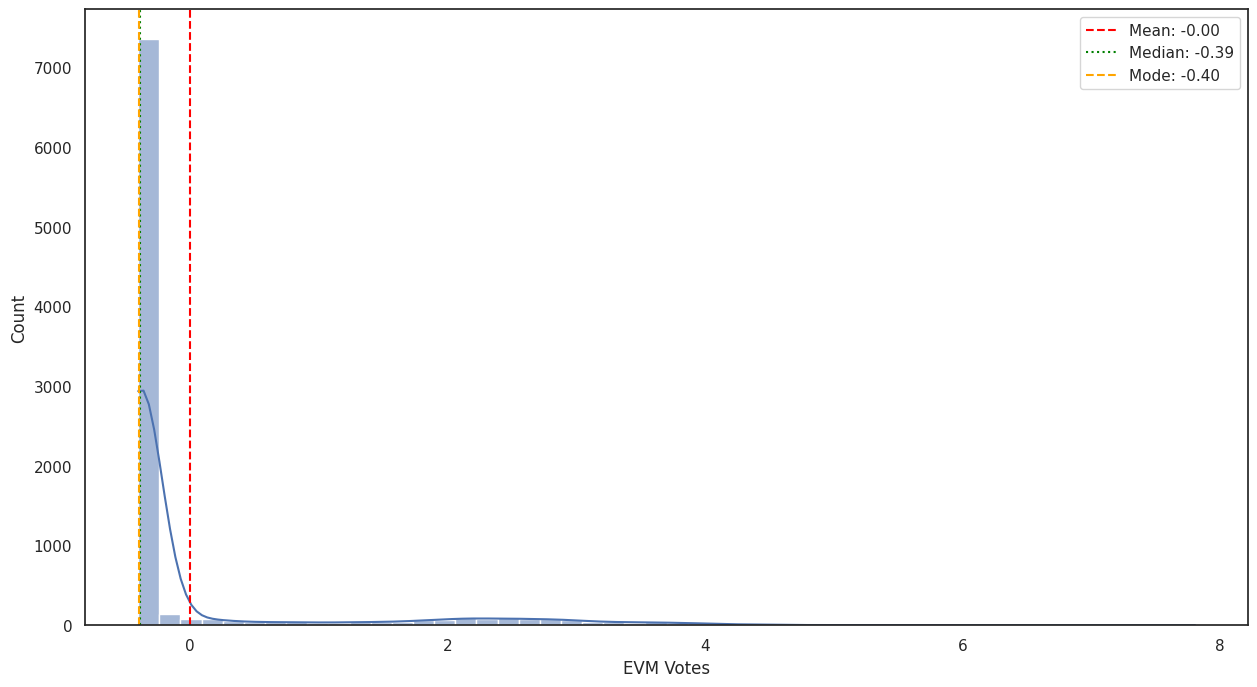

In [17]:
sns.histplot(x="EVM Votes", data=GE_results_standardized, kde=True, bins=50)
plt.axvline(GE_results_standardized["EVM Votes"].mean(),
            color="red", linestyle='dashed',
            label=f"Mean: {GE_results_standardized['EVM Votes'].mean():.2f}")
plt.axvline(GE_results_standardized["EVM Votes"].median(),
            color="green", linestyle='dotted',
            label=f"Median: {GE_results_standardized['EVM Votes'].median():.2f}")
plt.axvline(GE_results_standardized["EVM Votes"].mode()[0],
            color="orange", linestyle='dashed',
            label=f"Mode: {GE_results_standardized['EVM Votes'].mode()[0]:.2f}")
plt.legend()
plt.show()

In [18]:
# printing skewness of EVM votes
skewnessOfEVM = GE_results["EVM Votes"].skew()
print(f"Skewness of EVM Votes: {skewnessOfEVM:.2f}") # Skewness of EVM Votes: 2.70
# Which means it is right skewed data or positively skewed data

Skewness of EVM Votes: 2.70


In [19]:
# printing kurtosis of EVM votes
kurtosisOfEVM = GE_results["EVM Votes"].kurtosis()
print(f"Kurtosis of EVM Votes: {kurtosisOfEVM:.2f}")

Kurtosis of EVM Votes: 6.56


In [20]:
# printing skewness of Total votes
skewnessOfTotal = GE_results["Total Votes"].skew()
print(f"Skewness of Total Votes: {skewnessOfTotal:.2f}")

Skewness of Total Votes: 2.70


In [21]:
print(f"Kurtosis of Total Votes: {GE_results['Total Votes'].kurtosis():.2f}")
# Here kurtosis is greater than 3, so in the distribution of total votes has many outliers.

Kurtosis of Total Votes: 6.56


In [22]:
print(f"Kurtosis of Total Votes: {GE_results[GE_results['Result']=='Won']['Total Votes'].kurtosis():.2f}")
print(f"Skewness of Total Votes: {GE_results[GE_results['Result']=='Won']['Total Votes'].skew():.2f}")

Kurtosis of Total Votes: 2.12
Skewness of Total Votes: 0.19


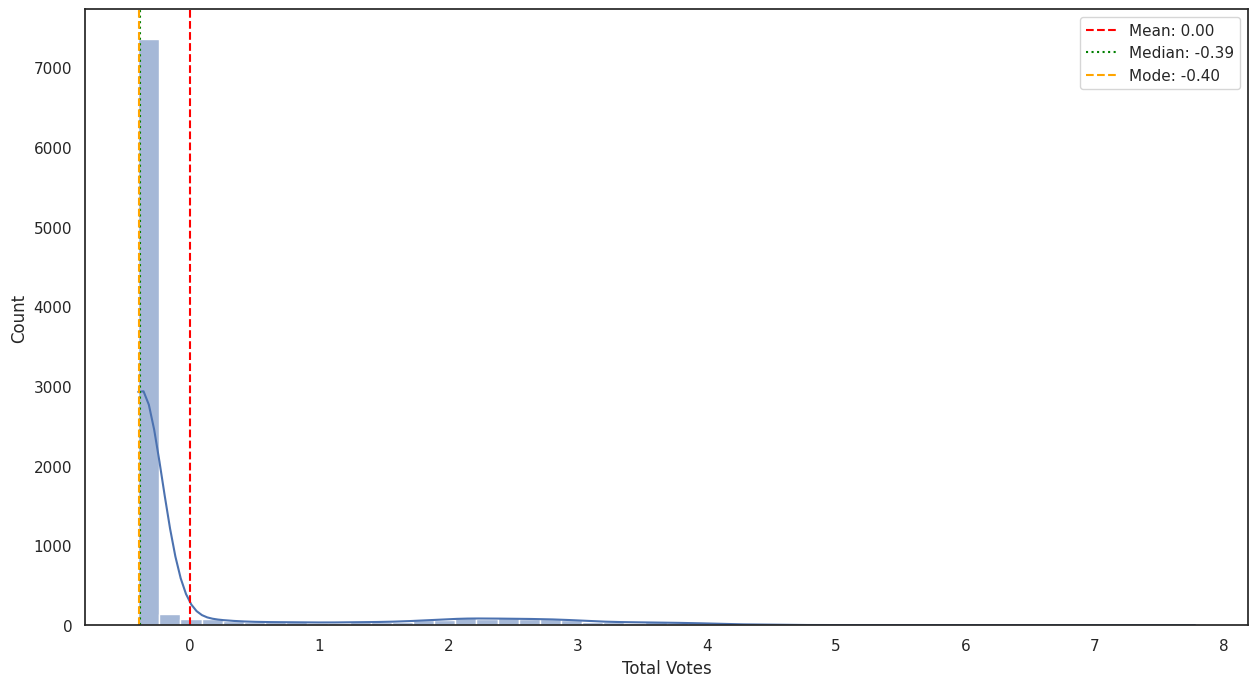

In [23]:
sns.histplot(x="Total Votes", data=GE_results_standardized, kde=True, bins=50)
plt.axvline(GE_results_standardized["Total Votes"].mean(),
            color="red", linestyle='dashed',
            label=f"Mean: {GE_results_standardized['Total Votes'].mean():.2f}")

plt.axvline(GE_results_standardized["Total Votes"].median(),
            color="green", linestyle='dotted',
            label=f"Median: {GE_results_standardized['Total Votes'].median():.2f}")

plt.axvline(GE_results_standardized["Total Votes"].mode()[0],
            color="orange", linestyle='dashed',
            label=f"Mode: {GE_results_standardized['Total Votes'].mode()[0]:.2f}")
plt.legend()
plt.show()

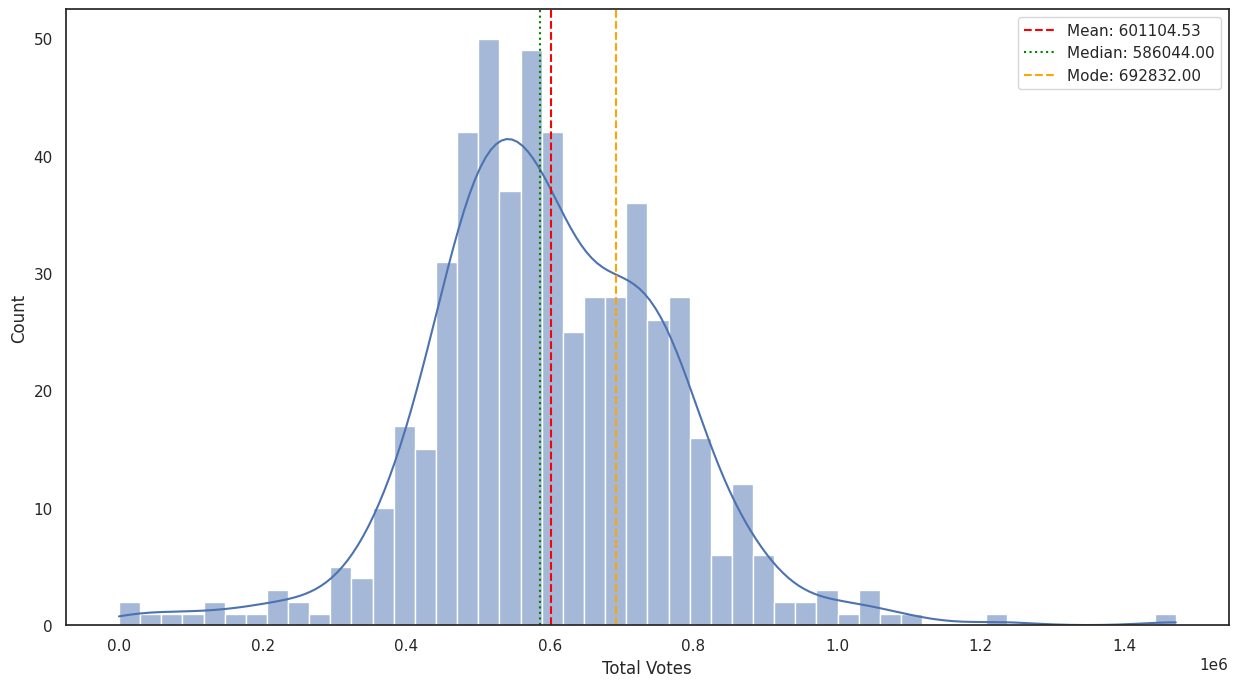

In [24]:
sns.histplot(x="Total Votes",
             data=GE_results[GE_results['Result']=='Won'],
             kde=True, bins=50
            )
plt.axvline(GE_results[GE_results['Result']=='Won']["Total Votes"].mean(),
            color="red", linestyle='dashed',
            label=f"Mean: {GE_results[GE_results['Result']=='Won']['Total Votes'].mean():.2f}"
          )
plt.axvline(GE_results[GE_results['Result']=='Won']["Total Votes"].median(),
            color="green", linestyle='dotted',
            label=f"Median: {GE_results[GE_results['Result']=='Won']['Total Votes'].median():.2f}"
          )
plt.axvline(GE_results[GE_results['Result']=='Won']["Total Votes"].mode()[0],
            color="orange", linestyle='dashed',
            label=f"Mode: {GE_results[GE_results['Result']=='Won']['Total Votes'].mode()[0]:.2f}"
          )
plt.legend()
plt.show()

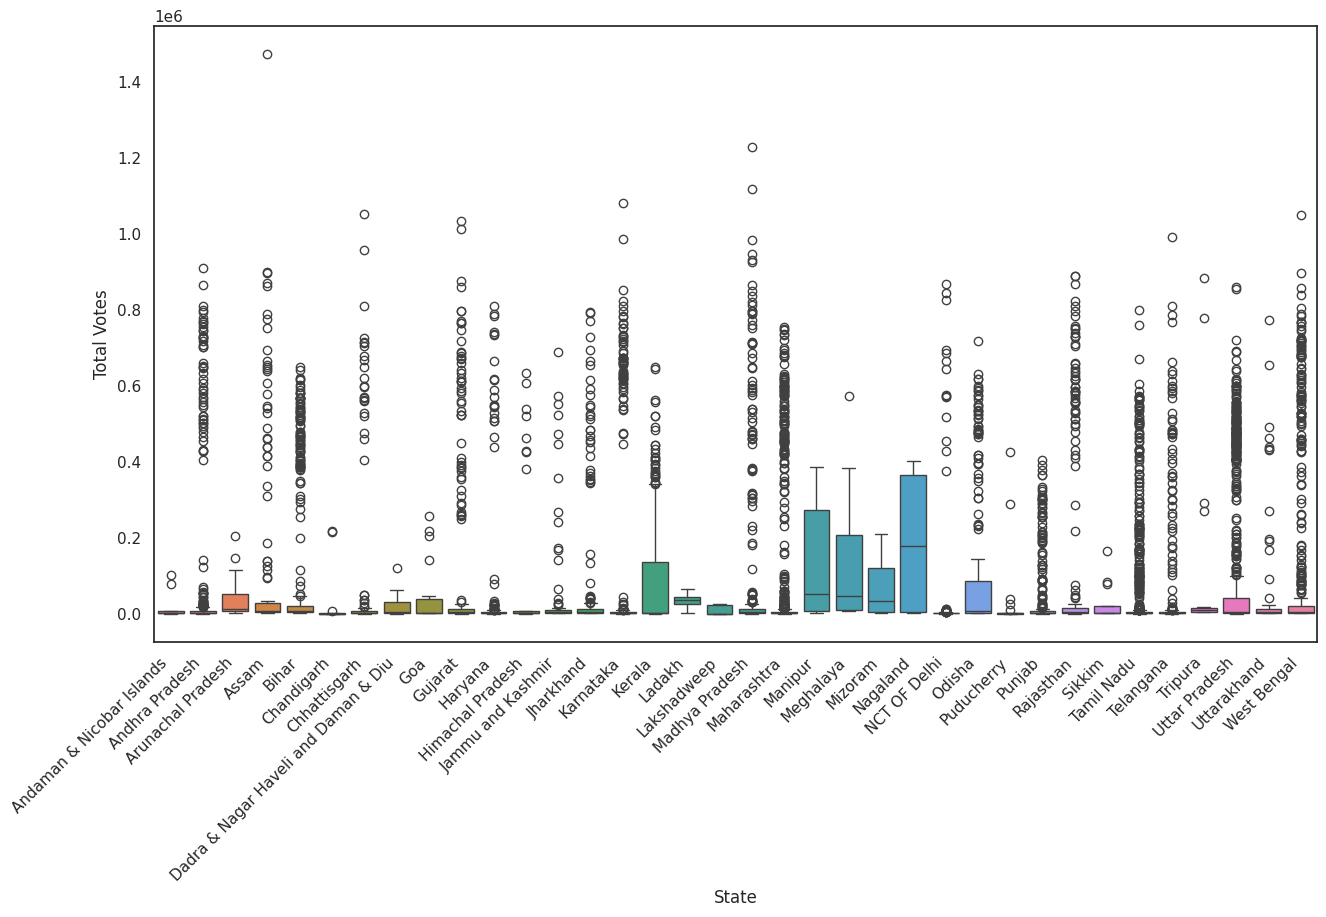

In [25]:
boxplot = sns.boxplot(
      x="State", y="Total Votes", data=GE_results,
      hue="State", legend=False
   )
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha="right")
plt.show()

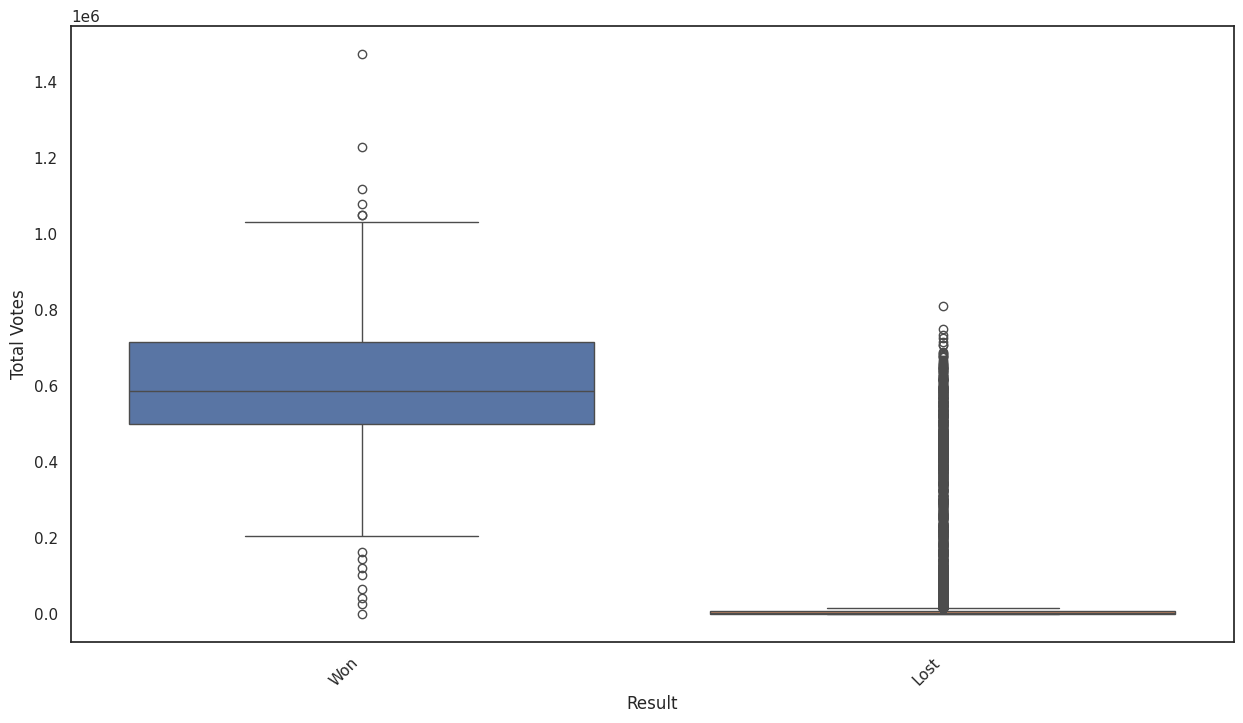

In [26]:
boxplot = sns.boxplot(
      x="Result", y="Total Votes", data=GE_results,
      hue="Result", legend=False
   )
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha="right")
plt.show()

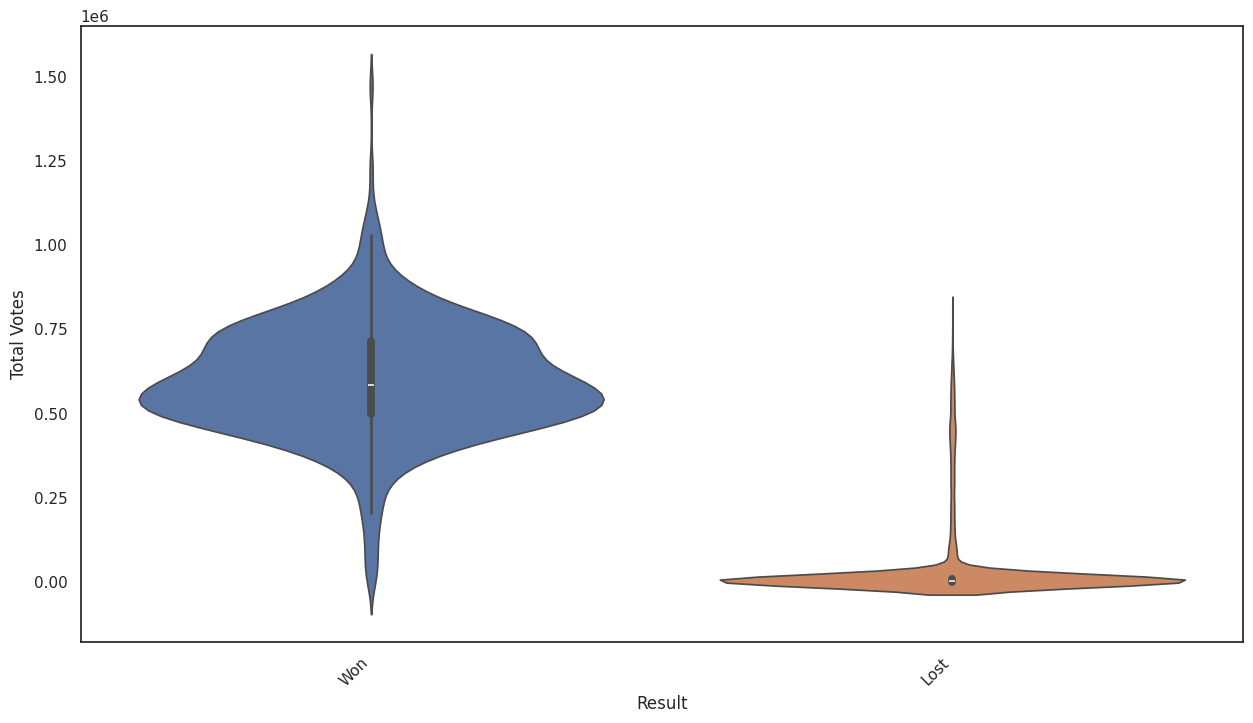

In [30]:
violinplot = sns.violinplot(
      x="Result", y="Total Votes", data=GE_results,
      hue="Result", legend=False
   )
violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [27]:
GE_2024_Statewise = GE_results.drop(["Constituency", "Party", "Candidate", "Result", "% of Votes"], axis=1).groupby('State').sum().reset_index()
GE_2024_Statewise.head(10)

,State,EVM Votes,Postal Votes,Total Votes
0,Andaman & Nicobar Islands,201992.0,522.0,202514
1,Andhra Pradesh,33258505.0,470837.0,33729342
2,Arunachal Pradesh,689824.0,33423.0,723247
3,Assam,19953259.0,106611.0,20059870
4,Bihar,43309971.0,138978.0,43448949
5,Chandigarh,448548.0,727.0,449275
6,Chhattisgarh,15023639.0,37709.0,15061348
7,Dadra & Nagar Haveli and Daman & Diu,297536.0,462.0,297998
8,Goa,896978.0,9560.0,906538
9,Gujarat,28839373.0,276226.0,29115599


In [28]:
GE_2024_Partywise = GE_results.drop(["Constituency", "Candidate", "Result", "% of Votes"], axis=1).groupby(['State', "Party"]).sum().reset_index()
GE_2024_Partywise.head(10)

,State,Party,EVM Votes,Postal Votes,Total Votes
0,Andaman & Nicobar Islands,All India Anna Dravida Munnetra Kazhagam,911.0,3.0,914
1,Andaman & Nicobar Islands,Andaman Nicobar Democratic Congress,8236.0,18.0,8254
2,Andaman & Nicobar Islands,Bahujan Samaj Party,714.0,5.0,719
3,Andaman & Nicobar Islands,Bharatiya Janata Party,102182.0,254.0,102436
4,Andaman & Nicobar Islands,Communist Party of India (Marxist),6009.0,8.0,6017
5,Andaman & Nicobar Islands,Independent,3960.0,14.0,3974
6,Andaman & Nicobar Islands,Indian National Congress,77829.0,211.0,78040
7,Andaman & Nicobar Islands,None of the Above,1802.0,7.0,1809
8,Andaman & Nicobar Islands,Socialist Unity Centre Of India (COMMUNIST),349.0,2.0,351
9,Andhra Pradesh,Aihra National Party,1567.0,1.0,1568


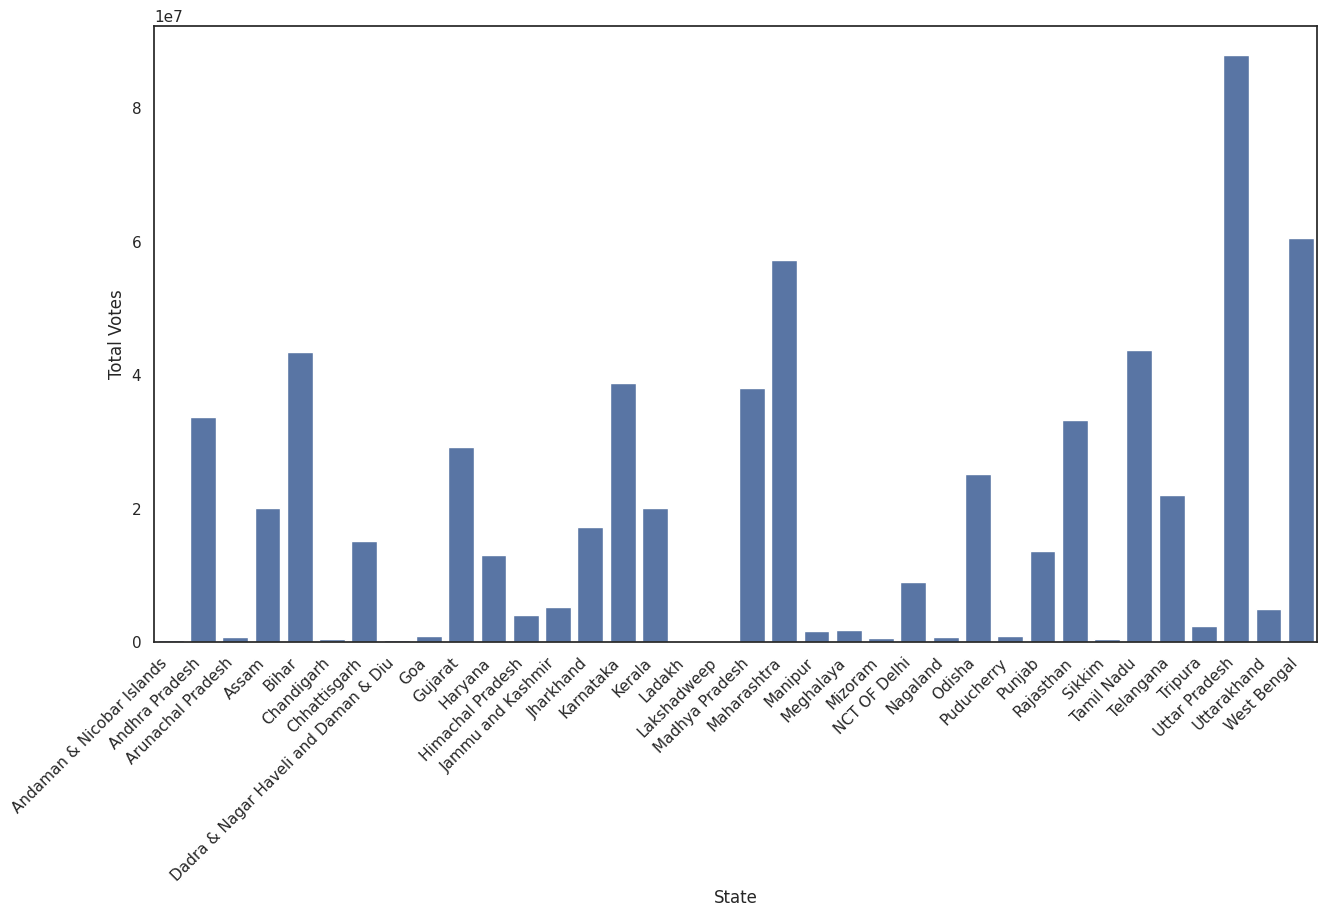

In [40]:
barplot = sns.barplot(x="State", y="Total Votes", data=GE_2024_Statewise)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha="right")
plt.show()